In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [48]:
# Importing the data:

expected_ctc= pd.read_csv('expected_ctc.csv')
expected_ctc.head(10)

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
5,6,30564,16,3,Top Management,Area Sales Manager,Retail,G,Director,Doctorate,Others,Bangalore,1998.0,Zoology,Bangalore,2000.0,Others,Bhubaneswar,2004.0,Pune,Bhubaneswar,3511167,Y,C,5,4,0,0,4522383
6,7,27267,1,1,Engineering,Team Lead,FMCG,L,Marketing Manager,Grad,Chemistry,Delhi,2011.0,Chemistry,Delhi,2013.0,Chemistry,Mangalore,2019.0,Delhi,Pune,492917,Y,B,3,3,0,0,630933
7,8,36521,19,11,Others,Analyst,Others,E,Manager,PG,Sociology,Delhi,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,Surat,Bangalore,2693459,N,C,6,1,1,0,3221376
8,9,11616,8,7,Analytics/BI,Others,Telecom,L,Marketing Manager,Doctorate,Psychology,Mumbai,2003.0,Psychology,Mumbai,2005.0,Psychology,Pune,2012.0,Nagpur,Guwahati,1630225,N,A,6,6,0,0,2288835
9,10,43886,15,15,Analytics/BI,CEO,Telecom,M,Product Manager,Doctorate,Chemistry,Delhi,1998.0,Chemistry,Delhi,2000.0,Chemistry,Jaipur,2005.0,Bangalore,Bhubaneswar,1761797,Y,A,5,6,0,1,2466515


In [49]:
# Accomodating all columns on screen:

pd.options.display.max_columns = None

In [4]:
expected_ctc.head(10)

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
5,6,30564,16,3,Top Management,Area Sales Manager,Retail,G,Director,Doctorate,Others,Bangalore,1998.0,Zoology,Bangalore,2000.0,Others,Bhubaneswar,2004.0,Pune,Bhubaneswar,3511167,Y,C,5,4,0,0,4522383
6,7,27267,1,1,Engineering,Team Lead,FMCG,L,Marketing Manager,Grad,Chemistry,Delhi,2011.0,Chemistry,Delhi,2013.0,Chemistry,Mangalore,2019.0,Delhi,Pune,492917,Y,B,3,3,0,0,630933
7,8,36521,19,11,Others,Analyst,Others,E,Manager,PG,Sociology,Delhi,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,Surat,Bangalore,2693459,N,C,6,1,1,0,3221376
8,9,11616,8,7,Analytics/BI,Others,Telecom,L,Marketing Manager,Doctorate,Psychology,Mumbai,2003.0,Psychology,Mumbai,2005.0,Psychology,Pune,2012.0,Nagpur,Guwahati,1630225,N,A,6,6,0,0,2288835
9,10,43886,15,15,Analytics/BI,CEO,Telecom,M,Product Manager,Doctorate,Chemistry,Delhi,1998.0,Chemistry,Delhi,2000.0,Chemistry,Jaipur,2005.0,Bangalore,Bhubaneswar,1761797,Y,A,5,6,0,1,2466515


In [5]:
### Detailed EDA has already been done in Project Notes-1, however, some of the feaure transformations will be repeated here in order to to set the context.

In [5]:
# Checking the total entries:

expected_ctc.size

725000

In [50]:
# Checking the data structure:

expected_ctc.shape

(25000, 29)

In [6]:
# Checking the data types:

expected_ctc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [51]:
#Dropping unnecessary columns that are unique identifiers and do not add any value to the salary prediction process:

expected_ctc=expected_ctc.drop(columns=["IDX","Applicant_ID"])

In [8]:
expected_ctc.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [52]:
expected_ctc.shape

(25000, 27)

In [53]:
# Converting year_of_passing variables to categorical type:

expected_ctc['Passing_Year_Of_Graduation']=expected_ctc['Passing_Year_Of_Graduation'].astype("object")
expected_ctc['Passing_Year_Of_PG']=expected_ctc['Passing_Year_Of_PG'].astype("object")
expected_ctc['Passing_Year_Of_PHD']=expected_ctc['Passing_Year_Of_PHD'].astype("object")
expected_ctc.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         22222 non-null  object
 3   Role                               24037 non-null  object
 4   Industry                           24092 non-null  object
 5   Organization                       24092 non-null  object
 6   Designation                        21871 non-null  object
 7   Education                          25000 non-null  object
 8   Graduation_Specialization          18820 non-null  object
 9   University_Grad                    18820 non-null  object
 10  Passing_Year_Of_Graduation         18820 non-null  object
 11  PG_Specialization                  17308 non-null  object
 12  Univ

In [54]:
# Since 'Total_Experience_in_field_applied' showed presence of utliers in Project Notes-1, they were imputed using IQR method:

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [55]:
lr,ur=remove_outlier(expected_ctc['Total_Experience_in_field_applied'])
expected_ctc['Total_Experience_in_field_applied']=np.where(expected_ctc['Total_Experience_in_field_applied']>ur,ur,expected_ctc['Total_Experience_in_field_applied'])
expected_ctc['Total_Experience_in_field_applied']=np.where(expected_ctc['Total_Experience_in_field_applied']<lr,lr,expected_ctc['Total_Experience_in_field_applied'])

In [56]:
## NaN value treatments:

# In columns - ""Industry","Last_Appraisal_Rating","Organization","Department","Role","Designation" - these NaN values are meaningful, so instead of imputing them, we replaced with a discrete categorical string value "None":

cat=["Industry","Last_Appraisal_Rating","Organization","Department","Role","Designation"]

for column in expected_ctc[cat]:
    expected_ctc[column]=expected_ctc[column].fillna("None")

In [57]:
## Similarly in columns - 'Graduation_Specialization','University_Grad','Passing_Year_Of_Graduation','PG_Specialization','University_PG','Passing_Year_Of_PG','PHD_Specialization','University_PHD','Passing_Year_Of_PHD' - these NaN values are meaningful, so instead of imputing them, we replaced with a discrete categorical string value "Not_applicable":

cat=['Graduation_Specialization','University_Grad','PG_Specialization','University_PG','PHD_Specialization','University_PHD']

for column in expected_ctc[cat]:
    expected_ctc[column]=expected_ctc[column].fillna("Not_Applicable")

In [14]:
# Checking if NaN are replaced correctly:

expected_ctc.head(20)

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0.0,None,None,None,None,None,PG,Arts,Lucknow,2020.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Guwahati,Pune,0,N,None,0,0,0,0,384551
1,23,14.0,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12.0,Top Management,Consultant,Training,J,None,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8.0,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
5,16,3.0,Top Management,Area Sales Manager,Retail,G,Director,Doctorate,Others,Bangalore,1998.0,Zoology,Bangalore,2000.0,Others,Bhubaneswar,2004.0,Pune,Bhubaneswar,3511167,Y,C,5,4,0,0,4522383
6,1,1.0,Engineering,Team Lead,FMCG,L,Marketing Manager,Grad,Chemistry,Delhi,2011.0,Chemistry,Delhi,2013.0,Chemistry,Mangalore,2019.0,Delhi,Pune,492917,Y,B,3,3,0,0,630933
7,19,11.0,Others,Analyst,Others,E,Manager,PG,Sociology,Delhi,2001.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Surat,Bangalore,2693459,N,C,6,1,1,0,3221376
8,8,7.0,Analytics/BI,Others,Telecom,L,Marketing Manager,Doctorate,Psychology,Mumbai,2003.0,Psychology,Mumbai,2005.0,Psychology,Pune,2012.0,Nagpur,Guwahati,1630225,N,A,6,6,0,0,2288835
9,15,15.0,Analytics/BI,CEO,Telecom,M,Product Manager,Doctorate,Chemistry,Delhi,1998.0,Chemistry,Delhi,2000.0,Chemistry,Jaipur,2005.0,Bangalore,Bhubaneswar,1761797,Y,A,5,6,0,1,2466515


In [18]:
### Converting discrete categorical to discrete numerical variables:


In [58]:
# Converting 'Inhand_Offer' to boolean values:

expected_ctc['Inhand_Offer'].replace(['N','Y'],[0,1],inplace=True )

In [59]:
expected_ctc['Inhand_Offer'].unique()

array([0, 1])

In [21]:
# There seem to be errors in the 'Education' column, since it is not capturing many of the qualifications of candidates, even though they have passed the said qualifications.
# Assuming that 'Education' has errors in it, we can create a new column 'Educational qualification' to capture the real scenario.

In [60]:
conditions=[
    (expected_ctc['University_PHD']=='Not_Applicable') & (expected_ctc['University_PG']=='Not_Applicable') & (expected_ctc['University_Grad']=='Not_Applicable'),
    (expected_ctc['University_PHD']=='Not_Applicable') & (expected_ctc['University_PG']=='Not_Applicable') & (expected_ctc['University_Grad']!='Not_Applicable'),
    (expected_ctc['University_PHD']=='Not_Applicable') & (expected_ctc['University_PG']!='Not_Applicable') & (expected_ctc['University_Grad']!='Not_Applicable'),
    (expected_ctc['University_PHD']!='Not_Applicable') & (expected_ctc['University_PG']!='Not_Applicable') & (expected_ctc['University_Grad']!='Not_Applicable'),
    ]

values=['Under_Grad','Graduate','Post_Grad','Doctorate']

In [61]:
expected_ctc['Edu_qualification']=np.select(conditions,values)
expected_ctc.head(25)

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Edu_qualification
0,0,0.0,None,None,None,None,None,PG,Arts,Lucknow,2020.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Guwahati,Pune,0,0,None,0,0,0,0,384551,Graduate
1,23,14.0,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,1,Key_Performer,2,4,0,0,3783729,Doctorate
2,21,12.0,Top Management,Consultant,Training,J,None,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,1,Key_Performer,5,3,0,0,3131325,Doctorate
3,15,8.0,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,0,C,5,3,0,0,2608833,Doctorate
4,10,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,0,C,2,3,0,0,2221390,Doctorate
5,16,3.0,Top Management,Area Sales Manager,Retail,G,Director,Doctorate,Others,Bangalore,1998.0,Zoology,Bangalore,2000.0,Others,Bhubaneswar,2004.0,Pune,Bhubaneswar,3511167,1,C,5,4,0,0,4522383,Doctorate
6,1,1.0,Engineering,Team Lead,FMCG,L,Marketing Manager,Grad,Chemistry,Delhi,2011.0,Chemistry,Delhi,2013.0,Chemistry,Mangalore,2019.0,Delhi,Pune,492917,1,B,3,3,0,0,630933,Doctorate
7,19,11.0,Others,Analyst,Others,E,Manager,PG,Sociology,Delhi,2001.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Surat,Bangalore,2693459,0,C,6,1,1,0,3221376,Graduate
8,8,7.0,Analytics/BI,Others,Telecom,L,Marketing Manager,Doctorate,Psychology,Mumbai,2003.0,Psychology,Mumbai,2005.0,Psychology,Pune,2012.0,Nagpur,Guwahati,1630225,0,A,6,6,0,0,2288835,Doctorate
9,15,15.0,Analytics/BI,CEO,Telecom,M,Product Manager,Doctorate,Chemistry,Delhi,1998.0,Chemistry,Delhi,2000.0,Chemistry,Jaipur,2005.0,Bangalore,Bhubaneswar,1761797,1,A,5,6,0,1,2466515,Doctorate


In [62]:
# 'Education' column can now be dropped:

expected_ctc=expected_ctc.drop(columns=["Education"])

In [20]:
expected_ctc.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Edu_qualification
0,0,0.0,None,None,None,None,None,Arts,Lucknow,2020.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Guwahati,Pune,0,0,None,0,0,0,0,384551,Graduate
1,23,14.0,HR,Consultant,Analytics,H,HR,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,1,Key_Performer,2,4,0,0,3783729,Doctorate
2,21,12.0,Top Management,Consultant,Training,J,None,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,1,Key_Performer,5,3,0,0,3131325,Doctorate
3,15,8.0,Banking,Financial Analyst,Aviation,F,HR,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,0,C,5,3,0,0,2608833,Doctorate
4,10,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,0,C,2,3,0,0,2221390,Doctorate


In [63]:
expected_ctc['Edu_qualification'].unique()

array(['Graduate', 'Doctorate', 'Under_Grad', 'Post_Grad'], dtype=object)

In [64]:
# Ordinal encoding for 'Edu_qualification', since EDA has shown a distinct increase in expected salary with increase in education level::

scores={"Under_Grad":0,"Graduate":1,"Post_Grad":2,"Doctorate":3}
expected_ctc['Edu_qualification']=expected_ctc['Edu_qualification'].replace(scores)

In [65]:
expected_ctc['Edu_qualification'].unique()

array([1, 3, 0, 2])

In [24]:
expected_ctc.head(10)

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Edu_qualification
0,0,0.0,None,None,None,None,None,Arts,Lucknow,2020.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Guwahati,Pune,0,0,None,0,0,0,0,384551,1
1,23,14.0,HR,Consultant,Analytics,H,HR,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,1,Key_Performer,2,4,0,0,3783729,3
2,21,12.0,Top Management,Consultant,Training,J,None,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,1,Key_Performer,5,3,0,0,3131325,3
3,15,8.0,Banking,Financial Analyst,Aviation,F,HR,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,0,C,5,3,0,0,2608833,3
4,10,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,0,C,2,3,0,0,2221390,3
5,16,3.0,Top Management,Area Sales Manager,Retail,G,Director,Others,Bangalore,1998.0,Zoology,Bangalore,2000.0,Others,Bhubaneswar,2004.0,Pune,Bhubaneswar,3511167,1,C,5,4,0,0,4522383,3
6,1,1.0,Engineering,Team Lead,FMCG,L,Marketing Manager,Chemistry,Delhi,2011.0,Chemistry,Delhi,2013.0,Chemistry,Mangalore,2019.0,Delhi,Pune,492917,1,B,3,3,0,0,630933,3
7,19,11.0,Others,Analyst,Others,E,Manager,Sociology,Delhi,2001.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Surat,Bangalore,2693459,0,C,6,1,1,0,3221376,1
8,8,7.0,Analytics/BI,Others,Telecom,L,Marketing Manager,Psychology,Mumbai,2003.0,Psychology,Mumbai,2005.0,Psychology,Pune,2012.0,Nagpur,Guwahati,1630225,0,A,6,6,0,0,2288835,3
9,15,15.0,Analytics/BI,CEO,Telecom,M,Product Manager,Chemistry,Delhi,1998.0,Chemistry,Delhi,2000.0,Chemistry,Jaipur,2005.0,Bangalore,Bhubaneswar,1761797,1,A,5,6,0,1,2466515,3


In [25]:
expected_ctc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  float64
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Organization                       25000 non-null  object 
 6   Designation                        25000 non-null  object 
 7   Graduation_Specialization          25000 non-null  object 
 8   University_Grad                    25000 non-null  object 
 9   Passing_Year_Of_Graduation         18820 non-null  object 
 10  PG_Specialization                  25000 non-null  object 
 11  University_PG                      25000 non-null  obj

In [31]:
# For data preprocessing, dummy encoding of catrgorical variables will be a necessity. However, since there are way too many unique categorical variables, categories must be reduced without losing the essence of the data.

In [66]:
## Changing city names to tiers to reduce dimensionality post encoding in multiple columns:

expected_ctc.replace(dict.fromkeys(['Bangalore','Chennai','Hyderabad','Mumbai','Kolkata','Delhi'],'Tier-1'),inplace=True)


In [67]:
expected_ctc.replace(dict.fromkeys(['Mangalore','Jaipur','Bhubaneswar','Ahmedabad','Guwahati','Kanpur','Nagpur','Lucknow','Pune','Surat'],'Tier-2'),inplace=True)


In [28]:
expected_ctc.head(10)

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Edu_qualification
0,0,0.0,None,None,None,None,None,Arts,Tier-2,2020.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Tier-2,Tier-2,0,0,None,0,0,0,0,384551,1
1,23,14.0,HR,Consultant,Analytics,H,HR,Chemistry,Tier-2,1988.0,Others,Tier-2,1990.0,Chemistry,Tier-2,1997.0,Tier-1,Tier-2,2702664,1,Key_Performer,2,4,0,0,3783729,3
2,21,12.0,Top Management,Consultant,Training,J,None,Zoology,Tier-2,1990.0,Zoology,Tier-2,1992.0,Zoology,Tier-2,1999.0,Tier-2,Tier-2,2236661,1,Key_Performer,5,3,0,0,3131325,3
3,15,8.0,Banking,Financial Analyst,Aviation,F,HR,Others,Tier-1,1997.0,Zoology,Tier-1,1999.0,Chemistry,Tier-2,2005.0,Tier-2,Tier-1,2100510,0,C,5,3,0,0,2608833,3
4,10,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Zoology,Tier-1,2004.0,Zoology,Tier-1,2006.0,Zoology,Tier-1,2010.0,Tier-2,Tier-2,1931644,0,C,2,3,0,0,2221390,3
5,16,3.0,Top Management,Area Sales Manager,Retail,G,Director,Others,Tier-1,1998.0,Zoology,Tier-1,2000.0,Others,Tier-2,2004.0,Tier-2,Tier-2,3511167,1,C,5,4,0,0,4522383,3
6,1,1.0,Engineering,Team Lead,FMCG,L,Marketing Manager,Chemistry,Tier-1,2011.0,Chemistry,Tier-1,2013.0,Chemistry,Tier-2,2019.0,Tier-1,Tier-2,492917,1,B,3,3,0,0,630933,3
7,19,11.0,Others,Analyst,Others,E,Manager,Sociology,Tier-1,2001.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Tier-2,Tier-1,2693459,0,C,6,1,1,0,3221376,1
8,8,7.0,Analytics/BI,Others,Telecom,L,Marketing Manager,Psychology,Tier-1,2003.0,Psychology,Tier-1,2005.0,Psychology,Tier-2,2012.0,Tier-2,Tier-2,1630225,0,A,6,6,0,0,2288835,3
9,15,15.0,Analytics/BI,CEO,Telecom,M,Product Manager,Chemistry,Tier-1,1998.0,Chemistry,Tier-1,2000.0,Chemistry,Tier-2,2005.0,Tier-1,Tier-2,1761797,1,A,5,6,0,1,2466515,3


In [68]:
# Checking for unique values:

columns=["Curent_Location","Preferred_location","University_PHD","University_PG","University_Grad"]

for column in expected_ctc[columns]:
    print(column.upper(),': ',expected_ctc[column].nunique())
    print(expected_ctc[column].value_counts().sort_values(ascending=False))
    print('\n')

CURENT_LOCATION :  2
Tier-2    16631
Tier-1     8369
Name: Curent_Location, dtype: int64


PREFERRED_LOCATION :  2
Tier-2    16745
Tier-1     8255
Name: Preferred_location, dtype: int64


UNIVERSITY_PHD :  3
Not_Applicable    11881
Tier-2             8946
Tier-1             4173
Name: University_PHD, dtype: int64


UNIVERSITY_PG :  3
Tier-2            11981
Not_Applicable     7692
Tier-1             5327
Name: University_PG, dtype: int64


UNIVERSITY_GRAD :  3
Tier-2            13020
Not_Applicable     6180
Tier-1             5800
Name: University_Grad, dtype: int64




In [30]:
# Classifying years of graduation, PG and PHD into intervals so as to reduce dimensionality:

columns=["Passing_Year_Of_Graduation","Passing_Year_Of_PG","Passing_Year_Of_PHD"]

for column in expected_ctc[columns]:
    print(column.upper(),': ',expected_ctc[column].nunique())
    print(expected_ctc[column].value_counts())
    print('\n')

PASSING_YEAR_OF_GRADUATION :  35
1997.0    769
2011.0    744
2004.0    742
2005.0    741
2009.0    739
2001.0    734
2006.0    731
1998.0    720
1996.0    719
2002.0    716
1995.0    714
2008.0    714
2010.0    711
1999.0    708
2003.0    705
2007.0    701
2000.0    696
2012.0    586
1991.0    539
1990.0    525
1992.0    520
1994.0    511
1993.0    509
1989.0    482
2013.0    435
1988.0    372
2014.0    328
1987.0    252
2019.0    239
2015.0    223
2018.0    218
2020.0    217
2016.0    210
2017.0    204
1986.0    146
Name: Passing_Year_Of_Graduation, dtype: int64


PASSING_YEAR_OF_PG :  36
2011.0    816
2013.0    815
2010.0    774
2012.0    766
2009.0    759
2008.0    651
2014.0    646
1999.0    554
1993.0    539
2006.0    525
1992.0    525
1994.0    520
2003.0    515
2015.0    514
1998.0    512
1996.0    511
1995.0    509
2005.0    507
2007.0    506
1997.0    497
2001.0    491
2000.0    489
2004.0    486
1991.0    482
2002.0    472
2016.0    390
1990.0    372
2017.0    313
2022.0    2

In [69]:
bins=[1980,1985,1990,1995,2000,2005,2010,2015,2020,2025]

expected_ctc['Year_Graduation_bin']=pd.cut(x=expected_ctc['Passing_Year_Of_Graduation'],bins=bins)
expected_ctc['Year_PG_bin']=pd.cut(x=expected_ctc['Passing_Year_Of_PG'],bins=bins)
expected_ctc['Year_PHD_bin']=pd.cut(x=expected_ctc['Passing_Year_Of_PHD'],bins=bins)

In [32]:
expected_ctc.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Edu_qualification,Year_Graduation_bin,Year_PG_bin,Year_PHD_bin
0,0,0.0,None,None,None,None,None,Arts,Tier-2,2020.0,Not_Applicable,Not_Applicable,NaN,Not_Applicable,Not_Applicable,NaN,Tier-2,Tier-2,0,0,None,0,0,0,0,384551,1,"(2015, 2020]",NaN,NaN
1,23,14.0,HR,Consultant,Analytics,H,HR,Chemistry,Tier-2,1988.0,Others,Tier-2,1990.0,Chemistry,Tier-2,1997.0,Tier-1,Tier-2,2702664,1,Key_Performer,2,4,0,0,3783729,3,"(1985, 1990]","(1985.0, 1990.0]","(1995.0, 2000.0]"
2,21,12.0,Top Management,Consultant,Training,J,None,Zoology,Tier-2,1990.0,Zoology,Tier-2,1992.0,Zoology,Tier-2,1999.0,Tier-2,Tier-2,2236661,1,Key_Performer,5,3,0,0,3131325,3,"(1985, 1990]","(1990.0, 1995.0]","(1995.0, 2000.0]"
3,15,8.0,Banking,Financial Analyst,Aviation,F,HR,Others,Tier-1,1997.0,Zoology,Tier-1,1999.0,Chemistry,Tier-2,2005.0,Tier-2,Tier-1,2100510,0,C,5,3,0,0,2608833,3,"(1995, 2000]","(1995.0, 2000.0]","(2000.0, 2005.0]"
4,10,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Zoology,Tier-1,2004.0,Zoology,Tier-1,2006.0,Zoology,Tier-1,2010.0,Tier-2,Tier-2,1931644,0,C,2,3,0,0,2221390,3,"(2000, 2005]","(2005.0, 2010.0]","(2005.0, 2010.0]"


In [70]:
check_nan_in_data=expected_ctc.isnull().sum()
print(check_nan_in_data)

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                               0
Role                                     0
Industry                                 0
Organization                             0
Designation                              0
Graduation_Specialization                0
University_Grad                          0
Passing_Year_Of_Graduation            6180
PG_Specialization                        0
University_PG                            0
Passing_Year_Of_PG                    7692
PHD_Specialization                       0
University_PHD                           0
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                    0
No_Of_Companies_worked                   0
Number_of_Publications                   0
Certificati

In [71]:
# Replacing NaN values with 'Not Applicable', since here imputation does not make sense:

cat=['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD']
for column in expected_ctc[cat]:
    expected_ctc[column]=expected_ctc[column].fillna("Not_Applicable")


In [35]:
expected_ctc.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Edu_qualification,Year_Graduation_bin,Year_PG_bin,Year_PHD_bin
0,0,0.0,None,None,None,None,None,Arts,Tier-2,2020.0,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Tier-2,Tier-2,0,0,None,0,0,0,0,384551,1,"(2015, 2020]",NaN,NaN
1,23,14.0,HR,Consultant,Analytics,H,HR,Chemistry,Tier-2,1988.0,Others,Tier-2,1990.0,Chemistry,Tier-2,1997.0,Tier-1,Tier-2,2702664,1,Key_Performer,2,4,0,0,3783729,3,"(1985, 1990]","(1985.0, 1990.0]","(1995.0, 2000.0]"
2,21,12.0,Top Management,Consultant,Training,J,None,Zoology,Tier-2,1990.0,Zoology,Tier-2,1992.0,Zoology,Tier-2,1999.0,Tier-2,Tier-2,2236661,1,Key_Performer,5,3,0,0,3131325,3,"(1985, 1990]","(1990.0, 1995.0]","(1995.0, 2000.0]"
3,15,8.0,Banking,Financial Analyst,Aviation,F,HR,Others,Tier-1,1997.0,Zoology,Tier-1,1999.0,Chemistry,Tier-2,2005.0,Tier-2,Tier-1,2100510,0,C,5,3,0,0,2608833,3,"(1995, 2000]","(1995.0, 2000.0]","(2000.0, 2005.0]"
4,10,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Zoology,Tier-1,2004.0,Zoology,Tier-1,2006.0,Zoology,Tier-1,2010.0,Tier-2,Tier-2,1931644,0,C,2,3,0,0,2221390,3,"(2000, 2005]","(2005.0, 2010.0]","(2005.0, 2010.0]"


In [72]:
# Converting year_bin variables to categorical type:

expected_ctc['Year_Graduation_bin']=expected_ctc['Year_Graduation_bin'].astype("object")
expected_ctc['Year_PG_bin']=expected_ctc['Year_PG_bin'].astype("object")
expected_ctc['Year_PHD_bin']=expected_ctc['Year_PHD_bin'].astype("object")
expected_ctc.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  float64
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Organization                       25000 non-null  object 
 6   Designation                        25000 non-null  object 
 7   Graduation_Specialization          25000 non-null  object 
 8   University_Grad                    25000 non-null  object 
 9   Passing_Year_Of_Graduation         25000 non-null  object 
 10  PG_Specialization                  25000 non-null  object 
 11  University_PG                      25000 non-null  obj

In [73]:
cat=['Year_Graduation_bin','Year_PG_bin','Year_PHD_bin']
for column in expected_ctc[cat]:
    expected_ctc[column]=expected_ctc[column].fillna("Not_Applicable")

In [44]:
expected_ctc.head(10)

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Edu_qualification,Year_Graduation_bin,Year_PG_bin,Year_PHD_bin
0,0,0.0,None,None,None,None,None,Arts,Tier-2,2020.0,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Tier-2,Tier-2,0,0,None,0,0,0,0,384551,1,"(2015, 2020]",Not_Applicable,Not_Applicable
1,23,14.0,HR,Consultant,Analytics,H,HR,Chemistry,Tier-2,1988.0,Others,Tier-2,1990.0,Chemistry,Tier-2,1997.0,Tier-1,Tier-2,2702664,1,Key_Performer,2,4,0,0,3783729,3,"(1985, 1990]","(1985, 1990]","(1995, 2000]"
2,21,12.0,Top Management,Consultant,Training,J,None,Zoology,Tier-2,1990.0,Zoology,Tier-2,1992.0,Zoology,Tier-2,1999.0,Tier-2,Tier-2,2236661,1,Key_Performer,5,3,0,0,3131325,3,"(1985, 1990]","(1990, 1995]","(1995, 2000]"
3,15,8.0,Banking,Financial Analyst,Aviation,F,HR,Others,Tier-1,1997.0,Zoology,Tier-1,1999.0,Chemistry,Tier-2,2005.0,Tier-2,Tier-1,2100510,0,C,5,3,0,0,2608833,3,"(1995, 2000]","(1995, 2000]","(2000, 2005]"
4,10,5.0,Sales,Project Manager,Insurance,E,Medical Officer,Zoology,Tier-1,2004.0,Zoology,Tier-1,2006.0,Zoology,Tier-1,2010.0,Tier-2,Tier-2,1931644,0,C,2,3,0,0,2221390,3,"(2000, 2005]","(2005, 2010]","(2005, 2010]"
5,16,3.0,Top Management,Area Sales Manager,Retail,G,Director,Others,Tier-1,1998.0,Zoology,Tier-1,2000.0,Others,Tier-2,2004.0,Tier-2,Tier-2,3511167,1,C,5,4,0,0,4522383,3,"(1995, 2000]","(1995, 2000]","(2000, 2005]"
6,1,1.0,Engineering,Team Lead,FMCG,L,Marketing Manager,Chemistry,Tier-1,2011.0,Chemistry,Tier-1,2013.0,Chemistry,Tier-2,2019.0,Tier-1,Tier-2,492917,1,B,3,3,0,0,630933,3,"(2010, 2015]","(2010, 2015]","(2015, 2020]"
7,19,11.0,Others,Analyst,Others,E,Manager,Sociology,Tier-1,2001.0,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Not_Applicable,Tier-2,Tier-1,2693459,0,C,6,1,1,0,3221376,1,"(2000, 2005]",Not_Applicable,Not_Applicable
8,8,7.0,Analytics/BI,Others,Telecom,L,Marketing Manager,Psychology,Tier-1,2003.0,Psychology,Tier-1,2005.0,Psychology,Tier-2,2012.0,Tier-2,Tier-2,1630225,0,A,6,6,0,0,2288835,3,"(2000, 2005]","(2000, 2005]","(2010, 2015]"
9,15,15.0,Analytics/BI,CEO,Telecom,M,Product Manager,Chemistry,Tier-1,1998.0,Chemistry,Tier-1,2000.0,Chemistry,Tier-2,2005.0,Tier-1,Tier-2,1761797,1,A,5,6,0,1,2466515,3,"(1995, 2000]","(1995, 2000]","(2000, 2005]"


In [74]:
check_nan_in_data=expected_ctc.isnull().sum()
print(check_nan_in_data)

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC             

In [75]:
## Changing education specialization names to subject categories in order to reduce dimensionality post encoding in multiple columns:

expected_ctc.replace(dict.fromkeys(['Chemistry','Zoology','Botony'],'Pure_sciences'),inplace=True)
expected_ctc.replace(dict.fromkeys(['Mathematics','Statistics'],'Maths_Stats'),inplace=True)
expected_ctc.replace(dict.fromkeys(['Arts','Psychology','Sociology'],'Arts_Humanities'),inplace=True)

In [76]:
columns=["Graduation_Specialization","PG_Specialization","PHD_Specialization"]

for column in expected_ctc[columns]:
    print(column.upper(),': ',expected_ctc[column].nunique())
    print(expected_ctc[column].value_counts())
    print('\n')

GRADUATION_SPECIALIZATION :  7
Not_Applicable     6180
Pure_sciences      5189
Arts_Humanities    5123
Maths_Stats        3413
Economics          1774
Engineering        1661
Others             1660
Name: Graduation_Specialization, dtype: int64


PG_SPECIALIZATION :  7
Not_Applicable     7692
Pure_sciences      4591
Arts_Humanities    4220
Maths_Stats        3439
Economics          1755
Engineering        1674
Others             1629
Name: PG_Specialization, dtype: int64


PHD_SPECIALIZATION :  7
Not_Applicable     11881
Pure_sciences       3445
Arts_Humanities     2913
Maths_Stats         2614
Others              1545
Economics           1343
Engineering         1259
Name: PHD_Specialization, dtype: int64




In [31]:
# Finally checking for unique categorical values: (to check data hygiene)

categorical=['Department','Role','Industry','Organization','Designation','Graduation_Specialization','University_Grad','PG_Specialization','University_PG','PHD_Specialization','University_PHD','Curent_Location','Preferred_location','Inhand_Offer','Last_Appraisal_Rating','No_Of_Companies_worked','Number_of_Publications','Certifications','International_degree_any','Edu_qualification','Year_Graduation_bin','Year_PG_bin','Year_PHD_bin']

for column in expected_ctc[categorical]:
    print(column.upper(),': ',expected_ctc[column].nunique())
    print(expected_ctc[column].value_counts().sort_values(ascending=False))
    print('\n')

DEPARTMENT :  13
None              2778
Marketing         2379
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: Department, dtype: int64


ROLE :  25
Others                  2248
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
None                     963
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Re

In [77]:
expected_ctc= pd.get_dummies(expected_ctc, columns=['Department','Role','Industry','Organization','Designation','Last_Appraisal_Rating','Graduation_Specialization','University_Grad','PG_Specialization','University_PG','PHD_Specialization','University_PHD','Curent_Location','Preferred_location','Year_Graduation_bin','Year_PG_bin','Year_PHD_bin'],drop_first=True)

In [43]:
expected_ctc.head(10)

,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Edu_qualification,Department_Analytics/BI,Department_Banking,Department_Education,Department_Engineering,Department_HR,Department_Healthcare,Department_IT-Software,Department_Marketing,Department_None,Department_Others,Department_Sales,Department_Top Management,Role_Area Sales Manager,Role_Associate,Role_Bio statistician,Role_Business Analyst,Role_CEO,Role_Consultant,Role_Data scientist,Role_Financial Analyst,Role_Head,Role_Lab Executuve,Role_None,Role_Others,Role_Principal Analyst,Role_Professor,Role_Project Manager,Role_Research Scientist,Role_Researcher,Role_Sales Execituve,Role_Sales Manager,Role_Scientist,Role_Senior Analyst,Role_Senior Researcher,Role_Sr. Business Analyst,Role_Team Lead,Industry_Automobile,Industry_Aviation,Industry_BFSI,Industry_FMCG,Industry_IT,Industry_Insurance,Industry_None,Industry_Others,Industry_Retail,Industry_Telecom,Industry_Training,Organization_B,Organization_C,Organization_D,Organization_E,Organization_F,Organization_G,Organization_H,Organization_I,Organization_J,Organization_K,Organization_L,Organization_M,Organization_N,Organization_None,Organization_O,Organization_P,Designation_CA,Designation_Consultant,Designation_Data Analyst,Designation_Director,Designation_HR,Designation_Manager,Designation_Marketing Manager,Designation_Medical Officer,Designation_Network Engineer,Designation_None,Designation_Others,Designation_Product Manager,Designation_Research Analyst,Designation_Research Scientist,Designation_Scientist,Designation_Software Developer,Designation_Sr.Manager,Designation_Web Designer,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Last_Appraisal_Rating_None,Graduation_Specialization_Economics,Graduation_Specialization_Engineering,Graduation_Specialization_Maths_Stats,Graduation_Specialization_Not_Applicable,Graduation_Specialization_Others,Graduation_Specialization_Pure_sciences,University_Grad_Tier-1,University_Grad_Tier-2,PG_Specialization_Economics,PG_Specialization_Engineering,PG_Specialization_Maths_Stats,PG_Specialization_Not_Applicable,PG_Specialization_Others,PG_Specialization_Pure_sciences,University_PG_Tier-1,University_PG_Tier-2,PHD_Specialization_Economics,PHD_Specialization_Engineering,PHD_Specialization_Maths_Stats,PHD_Specialization_Not_Applicable,PHD_Specialization_Others,PHD_Specialization_Pure_sciences,University_PHD_Tier-1,University_PHD_Tier-2,Curent_Location_Tier-2,Preferred_location_Tier-2,"Year_Graduation_bin_(1990, 1995]","Year_Graduation_bin_(1995, 2000]","Year_Graduation_bin_(2000, 2005]","Year_Graduation_bin_(2005, 2010]","Year_Graduation_bin_(2010, 2015]","Year_Graduation_bin_(2015, 2020]",Year_Graduation_bin_Not_Applicable,"Year_PG_bin_(1990, 1995]","Year_PG_bin_(1995, 2000]","Year_PG_bin_(2000, 2005]","Year_PG_bin_(2005, 2010]","Year_PG_bin_(2010, 2015]","Year_PG_bin_(2015, 2020]","Year_PG_bin_(2020, 2025]",Year_PG_bin_Not_Applicable,"Year_PHD_bin_(1995, 2000]","Year_PHD_bin_(2000, 2005]","Year_PHD_bin_(2005, 2010]","Year_PHD_bin_(2010, 2015]","Year_PHD_bin_(2015, 2020]",Year_PHD_bin_Not_Applicable
0,0,0.0,2020.0,Not_Applicable,Not_Applicable,0,0,0,0,0,0,384551,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,23,14.0,1988.0,1990.0,1997.0,2702664,1,2,4,0,0,3783729,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,21,12.0,1990

In [78]:
# Columns 'Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD' can now be dropped:

expected_ctc=expected_ctc.drop(columns=['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD'])

In [79]:
expected_ctc.shape

(25000, 143)

In [80]:
expected_ctc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 143 entries, Total_Experience to Year_PHD_bin_Not_Applicable
dtypes: float64(1), int64(9), uint8(133)
memory usage: 5.1 MB


In [54]:
### Model building:

In [81]:
#Extracting the target column to create separate vectors for splitting data:

x = expected_ctc.drop("Expected_CTC", axis=1)
y = expected_ctc.pop("Expected_CTC")

x.head()

,Total_Experience,Total_Experience_in_field_applied,Current_CTC,Inhand_Offer,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Edu_qualification,Department_Analytics/BI,Department_Banking,Department_Education,Department_Engineering,Department_HR,Department_Healthcare,Department_IT-Software,Department_Marketing,Department_None,Department_Others,Department_Sales,Department_Top Management,Role_Area Sales Manager,Role_Associate,Role_Bio statistician,Role_Business Analyst,Role_CEO,Role_Consultant,Role_Data scientist,Role_Financial Analyst,Role_Head,Role_Lab Executuve,Role_None,Role_Others,Role_Principal Analyst,Role_Professor,Role_Project Manager,Role_Research Scientist,Role_Researcher,Role_Sales Execituve,Role_Sales Manager,Role_Scientist,Role_Senior Analyst,Role_Senior Researcher,Role_Sr. Business Analyst,Role_Team Lead,Industry_Automobile,Industry_Aviation,Industry_BFSI,Industry_FMCG,Industry_IT,Industry_Insurance,Industry_None,Industry_Others,Industry_Retail,Industry_Telecom,Industry_Training,Organization_B,Organization_C,Organization_D,Organization_E,Organization_F,Organization_G,Organization_H,Organization_I,Organization_J,Organization_K,Organization_L,Organization_M,Organization_N,Organization_None,Organization_O,Organization_P,Designation_CA,Designation_Consultant,Designation_Data Analyst,Designation_Director,Designation_HR,Designation_Manager,Designation_Marketing Manager,Designation_Medical Officer,Designation_Network Engineer,Designation_None,Designation_Others,Designation_Product Manager,Designation_Research Analyst,Designation_Research Scientist,Designation_Scientist,Designation_Software Developer,Designation_Sr.Manager,Designation_Web Designer,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Last_Appraisal_Rating_None,Graduation_Specialization_Economics,Graduation_Specialization_Engineering,Graduation_Specialization_Maths_Stats,Graduation_Specialization_Not_Applicable,Graduation_Specialization_Others,Graduation_Specialization_Pure_sciences,University_Grad_Tier-1,University_Grad_Tier-2,PG_Specialization_Economics,PG_Specialization_Engineering,PG_Specialization_Maths_Stats,PG_Specialization_Not_Applicable,PG_Specialization_Others,PG_Specialization_Pure_sciences,University_PG_Tier-1,University_PG_Tier-2,PHD_Specialization_Economics,PHD_Specialization_Engineering,PHD_Specialization_Maths_Stats,PHD_Specialization_Not_Applicable,PHD_Specialization_Others,PHD_Specialization_Pure_sciences,University_PHD_Tier-1,University_PHD_Tier-2,Curent_Location_Tier-2,Preferred_location_Tier-2,"Year_Graduation_bin_(1990, 1995]","Year_Graduation_bin_(1995, 2000]","Year_Graduation_bin_(2000, 2005]","Year_Graduation_bin_(2005, 2010]","Year_Graduation_bin_(2010, 2015]","Year_Graduation_bin_(2015, 2020]",Year_Graduation_bin_Not_Applicable,"Year_PG_bin_(1990, 1995]","Year_PG_bin_(1995, 2000]","Year_PG_bin_(2000, 2005]","Year_PG_bin_(2005, 2010]","Year_PG_bin_(2010, 2015]","Year_PG_bin_(2015, 2020]","Year_PG_bin_(2020, 2025]",Year_PG_bin_Not_Applicable,"Year_PHD_bin_(1995, 2000]","Year_PHD_bin_(2000, 2005]","Year_PHD_bin_(2005, 2010]","Year_PHD_bin_(2010, 2015]","Year_PHD_bin_(2015, 2020]",Year_PHD_bin_Not_Applicable
0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,23,14.0,2702664,1,2,4,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,21,12.0,2236661,1,5,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [82]:
#Splitting the data into Training & Testing sets:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [83]:
#checking the dimensions of the two sets:

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (17500, 142)
x_test (7500, 142)
y_train (17500,)
y_test (7500,)


In [37]:
# Building a LinearRegression model and finding the bestfit model on training data:

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [59]:
#Checking the coefficients for each feature:

from sklearn import metrics

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Total_Experience is -8878.501183020147
The coefficient for Total_Experience_in_field_applied is 109.85747729547577
The coefficient for Current_CTC is 1.3451085234755737
The coefficient for Inhand_Offer is 58203.141713945246
The coefficient for No_Of_Companies_worked is -109.34881139695062
The coefficient for Number_of_Publications is 418.26792001625654
The coefficient for Certifications is -14655.693347908782
The coefficient for International_degree_any is 113.31478400607011
The coefficient for Edu_qualification is 11462.077259360263
The coefficient for Department_Analytics/BI is -23963.357436118647
The coefficient for Department_Banking is -25843.61948847682
The coefficient for Department_Education is -2375.0662454810263
The coefficient for Department_Engineering is -24637.85506924418
The coefficient for Department_HR is -24765.537941022943
The coefficient for Department_Healthcare is -22548.46330289235
The coefficient for Department_IT-Software is -20603.088694197

In [51]:
#Finding the intercept value:

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 83923.89081323612


In [52]:
# Calculating R2:

r2_train=regression_model.score(x_train, y_train)
print("R2 on training data is {}".format(r2_train))
#93% of variation in price is explained by predictors in training set

#Calculating R2 on test data:
r2_test=regression_model.score(x_test, y_test)
print("R2 on test data is {}".format(r2_test))

R2 on training data is 0.9928744656374558
R2 on test data is 0.9930025402502967


In [84]:
from sklearn import metrics

In [55]:
# Calculating RSME:

predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
rsme_train=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RSME on training data is {}".format(rsme_train))

predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
rsme_test=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RSME on test data is {}".format(rsme_test))

RSME on training data is 97582.27324718762
RSME on test data is 97934.3355324096


In [85]:
## Using statsmodel for further clarity:
# Combining x and y into a single dataframe:

data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

,Total_Experience,Total_Experience_in_field_applied,Current_CTC,Inhand_Offer,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Edu_qualification,Department_Analytics/BI,Department_Banking,Department_Education,Department_Engineering,Department_HR,Department_Healthcare,Department_IT-Software,Department_Marketing,Department_None,Department_Others,Department_Sales,Department_Top Management,Role_Area Sales Manager,Role_Associate,Role_Bio statistician,Role_Business Analyst,Role_CEO,Role_Consultant,Role_Data scientist,Role_Financial Analyst,Role_Head,Role_Lab Executuve,Role_None,Role_Others,Role_Principal Analyst,Role_Professor,Role_Project Manager,Role_Research Scientist,Role_Researcher,Role_Sales Execituve,Role_Sales Manager,Role_Scientist,Role_Senior Analyst,Role_Senior Researcher,Role_Sr. Business Analyst,Role_Team Lead,Industry_Automobile,Industry_Aviation,Industry_BFSI,Industry_FMCG,Industry_IT,Industry_Insurance,Industry_None,Industry_Others,Industry_Retail,Industry_Telecom,Industry_Training,Organization_B,Organization_C,Organization_D,Organization_E,Organization_F,Organization_G,Organization_H,Organization_I,Organization_J,Organization_K,Organization_L,Organization_M,Organization_N,Organization_None,Organization_O,Organization_P,Designation_CA,Designation_Consultant,Designation_Data Analyst,Designation_Director,Designation_HR,Designation_Manager,Designation_Marketing Manager,Designation_Medical Officer,Designation_Network Engineer,Designation_None,Designation_Others,Designation_Product Manager,Designation_Research Analyst,Designation_Research Scientist,Designation_Scientist,Designation_Software Developer,Designation_Sr.Manager,Designation_Web Designer,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Last_Appraisal_Rating_None,Graduation_Specialization_Economics,Graduation_Specialization_Engineering,Graduation_Specialization_Maths_Stats,Graduation_Specialization_Not_Applicable,Graduation_Specialization_Others,Graduation_Specialization_Pure_sciences,University_Grad_Tier-1,University_Grad_Tier-2,PG_Specialization_Economics,PG_Specialization_Engineering,PG_Specialization_Maths_Stats,PG_Specialization_Not_Applicable,PG_Specialization_Others,PG_Specialization_Pure_sciences,University_PG_Tier-1,University_PG_Tier-2,PHD_Specialization_Economics,PHD_Specialization_Engineering,PHD_Specialization_Maths_Stats,PHD_Specialization_Not_Applicable,PHD_Specialization_Others,PHD_Specialization_Pure_sciences,University_PHD_Tier-1,University_PHD_Tier-2,Curent_Location_Tier-2,Preferred_location_Tier-2,"Year_Graduation_bin_(1990, 1995]","Year_Graduation_bin_(1995, 2000]","Year_Graduation_bin_(2000, 2005]","Year_Graduation_bin_(2005, 2010]","Year_Graduation_bin_(2010, 2015]","Year_Graduation_bin_(2015, 2020]",Year_Graduation_bin_Not_Applicable,"Year_PG_bin_(1990, 1995]","Year_PG_bin_(1995, 2000]","Year_PG_bin_(2000, 2005]","Year_PG_bin_(2005, 2010]","Year_PG_bin_(2010, 2015]","Year_PG_bin_(2015, 2020]","Year_PG_bin_(2020, 2025]",Year_PG_bin_Not_Applicable,"Year_PHD_bin_(1995, 2000]","Year_PHD_bin_(2000, 2005]","Year_PHD_bin_(2005, 2010]","Year_PHD_bin_(2010, 2015]","Year_PHD_bin_(2015, 2020]",Year_PHD_bin_Not_Applicable,Expected_CTC
4289,16,6.0,2599539,0,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3109048
19621,12,11.0,1590046,1,3,6,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2067059
14965,25,13.0,3641226,0,6,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [41]:
data_train.shape

(17500, 143)

In [65]:
data_train.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Current_CTC',
       'Inhand_Offer', 'No_Of_Companies_worked', 'Number_of_Publications',
       'Certifications', 'International_degree_any', 'Edu_qualification',
       'Department_Analytics/BI',
       ...
       'Year_PG_bin_(2015, 2020]', 'Year_PG_bin_(2020, 2025]',
       'Year_PG_bin_Not_Applicable', 'Year_PHD_bin_(1995, 2000]',
       'Year_PHD_bin_(2000, 2005]', 'Year_PHD_bin_(2005, 2010]',
       'Year_PHD_bin_(2010, 2015]', 'Year_PHD_bin_(2015, 2020]',
       'Year_PHD_bin_Not_Applicable', 'Expected_CTC'],
      dtype='object', length=143)

In [86]:
data_train.rename(columns = {'Department_Analytics/BI':'Department_Analytics_BI','Department_IT-Software':'Department_IT_Software','Department_Top Management':'Department_Top_Management','Role_Area Sales Manager':'Role_Area_Sales_Manager','Role_Bio statistician':'Role_Bio_statistician','Role_Business Analyst':'Role_Business_Analyst','Role_Data scientist':'Role_Data_scientist','Role_Financial Analyst':'Role_Financial_Analyst','Role_Lab Executuve':'Role_Lab_Executuve','Role_Principal Analyst':'Role_Principal_Analyst','Role_Project Manager':'Role_Project_Manager','Role_Research Scientist':'Role_Research_Scientist','Role_Sales Execituve':'Role_Sales_Execituve','Role_Sales Manager':'Role_Sales_Manager','Role_Senior Analyst':'Role_Senior_Analyst','Role_Senior Researcher':'Role_Senior_Researcher','Role_Sr. Business Analyst':'Role_Sr_Business_Analyst','Role_Team Lead':'Role_Team_Lead','Designation_Data Analyst':'Designation_Data_Analyst','Designation_Marketing Manager':'Designation_Marketing_Manager','Designation_Medical Officer':'Designation_Medical_Officer','Designation_Network Engineer':'Designation_Network_Engineer','Designation_Product Manager':'Designation_Product_Manager','Designation_Research Analyst':'Designation_Research_Analyst','Designation_Research Scientist':'Designation_Research_Scientist','Designation_Software Developer':'Designation_Software_Developer','Designation_Sr.Manager':'Designation_Sr_Manager','Designation_Web Designer':'Designation_Web_Designer','University_Grad_Tier-1':'University_Grad_Tier_1','University_Grad_Tier-2':'University_Grad_Tier_2','University_PG_Tier-1':'University_PG_Tier_1','University_PG_Tier-2':'University_PG_Tier_2','University_PHD_Tier-1':'University_PHD_Tier_1','University_PHD_Tier-2':'University_PHD_Tier_2','Curent_Location_Tier-2':'Curent_Location_Tier_2','Preferred_location_Tier-2':'Preferred_location_Tier_2','Year_Graduation_bin_(1990, 1995]':'Year_Graduation_bin_1990_1995','Year_Graduation_bin_(1995, 2000]':'Year_Graduation_bin_1995_2000','Year_Graduation_bin_(2000, 2005]':'Year_Graduation_bin_2000_2005','Year_Graduation_bin_(2005, 2010]':'Year_Graduation_bin_2005_2010','Year_Graduation_bin_(2010, 2015]':'Year_Graduation_bin_2010_2015','Year_Graduation_bin_(2015, 2020]':'Year_Graduation_bin_2015_2020','Year_PG_bin_(1990, 1995]':'Year_PG_bin_1990_1995','Year_PG_bin_(1995, 2000]':'Year_PG_bin_1995_2000','Year_PG_bin_(2000, 2005]':'Year_PG_bin_2000_2005','Year_PG_bin_(2005, 2010]':'Year_PG_bin_2005_2010','Year_PG_bin_(2010, 2015]':'Year_PG_bin_2010_2015','Year_PG_bin_(2015, 2020]':'Year_PG_bin_2015_2020','Year_PG_bin_(2020, 2025]':'Year_PG_bin_2020_2025','Year_PHD_bin_(1995, 2000]':'Year_PHD_bin_1995_2000','Year_PHD_bin_(2000, 2005]':'Year_PHD_bin_2000_2005','Year_PHD_bin_(2005, 2010]':'Year_PHD_bin_2005_2010','Year_PHD_bin_(2010, 2015]':'Year_PHD_bin_2010_2015','Year_PHD_bin_(2015, 2020]':'Year_PHD_bin_2015_2020'},inplace=True)


In [67]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Expected_CTC ~ Total_Experience + Total_Experience_in_field_applied + Current_CTC + Inhand_Offer + No_Of_Companies_worked + Number_of_Publications + Certifications + International_degree_any + Edu_qualification + Department_Analytics_BI + Department_Banking + Department_Education + Department_Engineering + Department_HR + Department_Healthcare + Department_IT_Software + Department_Marketing + Department_None + Department_Others + Department_Sales + Department_Top_Management + Role_Area_Sales_Manager + Role_Associate + Role_Bio_statistician + Role_Business_Analyst + Role_CEO + Role_Consultant + Role_Data_scientist + Role_Financial_Analyst + Role_Head + Role_Lab_Executuve + Role_None + Role_Others + Role_Principal_Analyst + Role_Professor + Role_Project_Manager + Role_Research_Scientist + Role_Researcher + Role_Sales_Execituve + Role_Sales_Manager + Role_Scientist + Role_Senior_Analyst + Role_Senior_Researcher + Role_Sr_Business_Analyst + Role_Team_Lead + Industry_Automobile + Industry_Aviation +Industry_BFSI + Industry_FMCG + Industry_IT + Industry_Insurance + Industry_None + Industry_Others + Industry_Retail + Industry_Telecom + Industry_Training + Organization_B + Organization_C + Organization_D + Organization_E + Organization_F + Organization_G + Organization_H + Organization_I + Organization_J + Organization_K + Organization_L + Organization_M + Organization_N + Organization_None + Organization_O + Organization_P + Designation_CA + Designation_Consultant + Designation_Data_Analyst + Designation_Director + Designation_HR + Designation_Manager + Designation_Marketing_Manager + Designation_Medical_Officer + Designation_Network_Engineer + Designation_None + Designation_Others + Designation_Product_Manager + Designation_Research_Analyst + Designation_Research_Scientist + Designation_Scientist + Designation_Software_Developer + Designation_Sr_Manager + Designation_Web_Designer + Last_Appraisal_Rating_B + Last_Appraisal_Rating_C + Last_Appraisal_Rating_D + Last_Appraisal_Rating_Key_Performer + Last_Appraisal_Rating_None + Graduation_Specialization_Economics + Graduation_Specialization_Engineering + Graduation_Specialization_Maths_Stats + Graduation_Specialization_Not_Applicable + Graduation_Specialization_Others + Graduation_Specialization_Pure_sciences + University_Grad_Tier_1 + University_Grad_Tier_2 + PG_Specialization_Economics + PG_Specialization_Engineering + PG_Specialization_Maths_Stats + PG_Specialization_Not_Applicable + PG_Specialization_Others + PG_Specialization_Pure_sciences + University_PG_Tier_1 + University_PG_Tier_2 + PHD_Specialization_Economics + PHD_Specialization_Engineering + PHD_Specialization_Maths_Stats + PHD_Specialization_Not_Applicable + PHD_Specialization_Others + PHD_Specialization_Pure_sciences + University_PHD_Tier_1 +University_PHD_Tier_2 +Curent_Location_Tier_2 + Preferred_location_Tier_2 + Year_Graduation_bin_1990_1995 + Year_Graduation_bin_1995_2000 + Year_Graduation_bin_2000_2005 + Year_Graduation_bin_2005_2010 + Year_Graduation_bin_2010_2015 + Year_Graduation_bin_2015_2020 + Year_Graduation_bin_Not_Applicable + Year_PG_bin_1990_1995 + Year_PG_bin_1995_2000 + Year_PG_bin_2000_2005 + Year_PG_bin_2005_2010 + Year_PG_bin_2010_2015 + Year_PG_bin_2015_2020 + Year_PG_bin_2020_2025 + Year_PG_bin_Not_Applicable + Year_PHD_bin_1995_2000 + Year_PHD_bin_2000_2005 + Year_PHD_bin_2005_2010 + Year_PHD_bin_2010_2015 + Year_PHD_bin_2015_2020 + Year_PHD_bin_Not_Applicable', data = data_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.819e+04
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        11:11:11   Log-Likelihood:            -2.2588e+05
No. Observations:               17500   AIC:                         4.520e+05
Df Residuals:                   17366   BIC:                         4.531e+05
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [70]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(x_test)-y_test)**2)

In [71]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

# so there is avg of 97934.335 (roundoff) mpg difference from real exp-ctc values on an avg

97934.3355324097

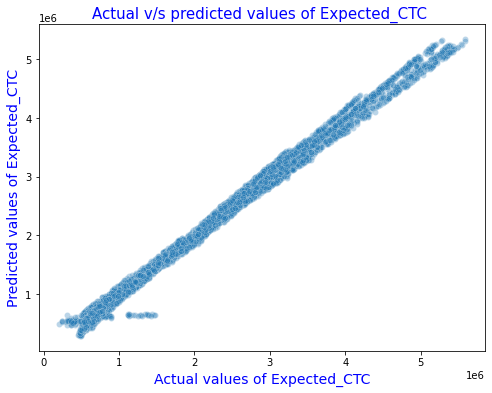

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=predicted_test, data=data_test, alpha=0.3)
plt.title("Actual v/s predicted values of Expected_CTC ",color="blue",size=15)
plt.xlabel("Actual values of Expected_CTC", color="blue",size=14)
plt.ylabel("Predicted values of Expected_CTC",color="blue",size=14)
plt.show()

In [ ]:
# Caculating VIF (Variable inflation Factor) to determine multicollinearity:

In [68]:
def vif_cal(input_data):
    vars=input_data
    var_names=input_data.columns
    for i in range(0,var_names.shape[0]):
        y=vars[var_names[i]] 
        x=vars[var_names.drop(var_names[i])]
        rsq=smf.ols(formula="y~x", data=vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (var_names[i], " VIF = " , vif)

In [69]:
vif_cal(input_data=data_train.drop('Expected_CTC',axis=1))

Total_Experience  VIF =  7.48
Total_Experience_in_field_applied  VIF =  1.74
Current_CTC  VIF =  5.42
Inhand_Offer  VIF =  1.62
No_Of_Companies_worked  VIF =  1.37
Number_of_Publications  VIF =  2.07
Certifications  VIF =  1.48
International_degree_any  VIF =  1.88


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Edu_qualification  VIF =  inf
Department_Analytics_BI  VIF =  3.03
Department_Banking  VIF =  2.68
Department_Education  VIF =  2.68
Department_Engineering  VIF =  2.62
Department_HR  VIF =  2.68
Department_Healthcare  VIF =  2.82
Department_IT_Software  VIF =  1.94
Department_Marketing  VIF =  2.98
Department_None  VIF =  3.95
Department_Others  VIF =  2.72
Department_Sales  VIF =  2.65
Department_Top_Management  VIF =  2.74
Role_Area_Sales_Manager  VIF =  1.18
Role_Associate  VIF =  1.46
Role_Bio_statistician  VIF =  1.89
Role_Business_Analyst  VIF =  1.8
Role_CEO  VIF =  1.85
Role_Consultant  VIF =  1.81
Role_Data_scientist  VIF =  1.46
Role_Financial_Analyst  VIF =  1.58
Role_Head  VIF =  1.86
Role_Lab_Executuve  VIF =  1.04
Role_None  VIF =  17.88
Role_Others  VIF =  2.06
Role_Principal_Analyst  VIF =  1.26
Role_Professor  VIF =  1.05
Role_Project_Manager  VIF =  1.86
Role_Research_Scientist  VIF =  1.05
Role_Researcher  VIF =  1.13
Role_Sales_Execituve  VIF =  1.75
Role_Sales_Man

<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Industry_None  VIF =  inf
Industry_Others  VIF =  1.79
Industry_Retail  VIF =  1.84
Industry_Telecom  VIF =  1.84
Industry_Training  VIF =  1.88
Organization_B  VIF =  1.87
Organization_C  VIF =  1.87
Organization_D  VIF =  1.87
Organization_E  VIF =  1.86
Organization_F  VIF =  1.88
Organization_G  VIF =  1.87
Organization_H  VIF =  1.88
Organization_I  VIF =  1.87
Organization_J  VIF =  1.92
Organization_K  VIF =  1.89
Organization_L  VIF =  1.87
Organization_M  VIF =  1.92
Organization_N  VIF =  1.84


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Organization_None  VIF =  inf
Organization_O  VIF =  1.85
Organization_P  VIF =  1.9
Designation_CA  VIF =  1.46
Designation_Consultant  VIF =  1.91
Designation_Data_Analyst  VIF =  1.9
Designation_Director  VIF =  1.49
Designation_HR  VIF =  1.95
Designation_Manager  VIF =  1.94
Designation_Marketing_Manager  VIF =  1.88
Designation_Medical_Officer  VIF =  1.71
Designation_Network_Engineer  VIF =  1.51
Designation_None  VIF =  3.13
Designation_Others  VIF =  1.94
Designation_Product_Manager  VIF =  1.91
Designation_Research_Analyst  VIF =  1.87
Designation_Research_Scientist  VIF =  1.37
Designation_Scientist  VIF =  1.05
Designation_Software_Developer  VIF =  1.55
Designation_Sr_Manager  VIF =  1.94
Designation_Web_Designer  VIF =  1.54
Last_Appraisal_Rating_B  VIF =  1.75
Last_Appraisal_Rating_C  VIF =  1.65
Last_Appraisal_Rating_D  VIF =  1.66
Last_Appraisal_Rating_Key_Performer  VIF =  1.92


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Last_Appraisal_Rating_None  VIF =  inf
Graduation_Specialization_Economics  VIF =  7.75
Graduation_Specialization_Engineering  VIF =  7.26
Graduation_Specialization_Maths_Stats  VIF =  8.47


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Graduation_Specialization_Not_Applicable  VIF =  inf
Graduation_Specialization_Others  VIF =  2.12
Graduation_Specialization_Pure_sciences  VIF =  5.27


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_Grad_Tier_1  VIF =  inf


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_Grad_Tier_2  VIF =  inf
PG_Specialization_Economics  VIF =  7.69
PG_Specialization_Engineering  VIF =  7.21
PG_Specialization_Maths_Stats  VIF =  8.46


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


PG_Specialization_Not_Applicable  VIF =  inf
PG_Specialization_Others  VIF =  2.02
PG_Specialization_Pure_sciences  VIF =  6.1


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_PG_Tier_1  VIF =  inf


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_PG_Tier_2  VIF =  inf
PHD_Specialization_Economics  VIF =  3.1
PHD_Specialization_Engineering  VIF =  3.29
PHD_Specialization_Maths_Stats  VIF =  3.7


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


PHD_Specialization_Not_Applicable  VIF =  inf
PHD_Specialization_Others  VIF =  1.7
PHD_Specialization_Pure_sciences  VIF =  3.19


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_PHD_Tier_1  VIF =  inf


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_PHD_Tier_2  VIF =  inf
Curent_Location_Tier_2  VIF =  1.04
Preferred_location_Tier_2  VIF =  1.01
Year_Graduation_bin_1990_1995  VIF =  4.57
Year_Graduation_bin_1995_2000  VIF =  10.46
Year_Graduation_bin_2000_2005  VIF =  13.16
Year_Graduation_bin_2005_2010  VIF =  14.19
Year_Graduation_bin_2010_2015  VIF =  10.83
Year_Graduation_bin_2015_2020  VIF =  6.3


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Year_Graduation_bin_Not_Applicable  VIF =  inf
Year_PG_bin_1990_1995  VIF =  6.72
Year_PG_bin_1995_2000  VIF =  12.42
Year_PG_bin_2000_2005  VIF =  17.46
Year_PG_bin_2005_2010  VIF =  27.78
Year_PG_bin_2010_2015  VIF =  33.79
Year_PG_bin_2015_2020  VIF =  16.09
Year_PG_bin_2020_2025  VIF =  8.34


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Year_PG_bin_Not_Applicable  VIF =  inf
Year_PHD_bin_1995_2000  VIF =  7.82
Year_PHD_bin_2000_2005  VIF =  13.81
Year_PHD_bin_2005_2010  VIF =  18.44
Year_PHD_bin_2010_2015  VIF =  24.61
Year_PHD_bin_2015_2020  VIF =  27.07
Year_PHD_bin_Not_Applicable  VIF =  inf


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


In [ ]:
### Iteration-2 --> dropping variable 'Total_Expeerience' which has highest VIF (7.48):

In [101]:
vif_cal(input_data=data_train.drop(['Expected_CTC','Total_Experience'],axis=1))

Total_Experience_in_field_applied  VIF =  1.57
Current_CTC  VIF =  3.57
Inhand_Offer  VIF =  1.62
No_Of_Companies_worked  VIF =  1.35
Number_of_Publications  VIF =  2.07
Certifications  VIF =  1.48
International_degree_any  VIF =  1.88


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Edu_qualification  VIF =  inf
Department_Analytics_BI  VIF =  3.02
Department_Banking  VIF =  2.67
Department_Education  VIF =  2.68
Department_Engineering  VIF =  2.61
Department_HR  VIF =  2.67
Department_Healthcare  VIF =  2.81
Department_IT_Software  VIF =  1.93
Department_Marketing  VIF =  2.97
Department_None  VIF =  3.94
Department_Others  VIF =  2.71
Department_Sales  VIF =  2.64
Department_Top_Management  VIF =  2.74
Role_Area_Sales_Manager  VIF =  1.18
Role_Associate  VIF =  1.45
Role_Bio_statistician  VIF =  1.89
Role_Business_Analyst  VIF =  1.8
Role_CEO  VIF =  1.85
Role_Consultant  VIF =  1.81
Role_Data_scientist  VIF =  1.46
Role_Financial_Analyst  VIF =  1.58
Role_Head  VIF =  1.85
Role_Lab_Executuve  VIF =  1.04
Role_None  VIF =  17.87
Role_Others  VIF =  2.06
Role_Principal_Analyst  VIF =  1.26
Role_Professor  VIF =  1.05
Role_Project_Manager  VIF =  1.86
Role_Research_Scientist  VIF =  1.05
Role_Researcher  VIF =  1.13
Role_Sales_Execituve  VIF =  1.75
Role_Sales_Man

<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Industry_None  VIF =  inf
Industry_Others  VIF =  1.79
Industry_Retail  VIF =  1.84
Industry_Telecom  VIF =  1.84
Industry_Training  VIF =  1.88
Organization_B  VIF =  1.87
Organization_C  VIF =  1.87
Organization_D  VIF =  1.87
Organization_E  VIF =  1.86
Organization_F  VIF =  1.88
Organization_G  VIF =  1.87
Organization_H  VIF =  1.88
Organization_I  VIF =  1.87
Organization_J  VIF =  1.92
Organization_K  VIF =  1.89
Organization_L  VIF =  1.87
Organization_M  VIF =  1.92
Organization_N  VIF =  1.84


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Organization_None  VIF =  inf
Organization_O  VIF =  1.85
Organization_P  VIF =  1.9
Designation_CA  VIF =  1.46
Designation_Consultant  VIF =  1.91
Designation_Data_Analyst  VIF =  1.9
Designation_Director  VIF =  1.49
Designation_HR  VIF =  1.95
Designation_Manager  VIF =  1.94
Designation_Marketing_Manager  VIF =  1.88
Designation_Medical_Officer  VIF =  1.71
Designation_Network_Engineer  VIF =  1.51
Designation_None  VIF =  3.13
Designation_Others  VIF =  1.94
Designation_Product_Manager  VIF =  1.91
Designation_Research_Analyst  VIF =  1.87
Designation_Research_Scientist  VIF =  1.37
Designation_Scientist  VIF =  1.05
Designation_Software_Developer  VIF =  1.55
Designation_Sr_Manager  VIF =  1.94
Designation_Web_Designer  VIF =  1.54
Last_Appraisal_Rating_B  VIF =  1.74
Last_Appraisal_Rating_C  VIF =  1.65
Last_Appraisal_Rating_D  VIF =  1.66
Last_Appraisal_Rating_Key_Performer  VIF =  1.92


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Last_Appraisal_Rating_None  VIF =  inf
Graduation_Specialization_Economics  VIF =  7.75
Graduation_Specialization_Engineering  VIF =  7.26
Graduation_Specialization_Maths_Stats  VIF =  8.47


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Graduation_Specialization_Not_Applicable  VIF =  inf
Graduation_Specialization_Others  VIF =  2.12
Graduation_Specialization_Pure_sciences  VIF =  5.27


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_Grad_Tier_1  VIF =  inf


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_Grad_Tier_2  VIF =  inf
PG_Specialization_Economics  VIF =  7.69
PG_Specialization_Engineering  VIF =  7.21
PG_Specialization_Maths_Stats  VIF =  8.46


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


PG_Specialization_Not_Applicable  VIF =  inf
PG_Specialization_Others  VIF =  2.02
PG_Specialization_Pure_sciences  VIF =  6.09


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_PG_Tier_1  VIF =  inf


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_PG_Tier_2  VIF =  inf
PHD_Specialization_Economics  VIF =  3.1
PHD_Specialization_Engineering  VIF =  3.29
PHD_Specialization_Maths_Stats  VIF =  3.7


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


PHD_Specialization_Not_Applicable  VIF =  inf
PHD_Specialization_Others  VIF =  1.7
PHD_Specialization_Pure_sciences  VIF =  3.19


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_PHD_Tier_1  VIF =  inf


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


University_PHD_Tier_2  VIF =  inf
Curent_Location_Tier_2  VIF =  1.04
Preferred_location_Tier_2  VIF =  1.01
Year_Graduation_bin_1990_1995  VIF =  4.55
Year_Graduation_bin_1995_2000  VIF =  10.36
Year_Graduation_bin_2000_2005  VIF =  12.61
Year_Graduation_bin_2005_2010  VIF =  13.24
Year_Graduation_bin_2010_2015  VIF =  10.0
Year_Graduation_bin_2015_2020  VIF =  5.72


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Year_Graduation_bin_Not_Applicable  VIF =  inf
Year_PG_bin_1990_1995  VIF =  6.71
Year_PG_bin_1995_2000  VIF =  12.4
Year_PG_bin_2000_2005  VIF =  17.46
Year_PG_bin_2005_2010  VIF =  27.77
Year_PG_bin_2010_2015  VIF =  33.79
Year_PG_bin_2015_2020  VIF =  16.09
Year_PG_bin_2020_2025  VIF =  8.34


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


Year_PG_bin_Not_Applicable  VIF =  inf
Year_PHD_bin_1995_2000  VIF =  7.79
Year_PHD_bin_2000_2005  VIF =  13.66
Year_PHD_bin_2005_2010  VIF =  18.3
Year_PHD_bin_2010_2015  VIF =  24.53
Year_PHD_bin_2015_2020  VIF =  27.0
Year_PHD_bin_Not_Applicable  VIF =  inf


<ipython-input-68-006ae825bd87>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


In [103]:
lm2 = smf.ols(formula= 'Expected_CTC ~ Total_Experience_in_field_applied + Current_CTC + Inhand_Offer + No_Of_Companies_worked + Number_of_Publications + Certifications + International_degree_any + Edu_qualification + Department_Analytics_BI + Department_Banking + Department_Education + Department_Engineering + Department_HR + Department_Healthcare + Department_IT_Software + Department_Marketing + Department_None + Department_Others + Department_Sales + Department_Top_Management + Role_Area_Sales_Manager + Role_Associate + Role_Bio_statistician + Role_Business_Analyst + Role_CEO + Role_Consultant + Role_Data_scientist + Role_Financial_Analyst + Role_Head + Role_Lab_Executuve + Role_None + Role_Others + Role_Principal_Analyst + Role_Professor + Role_Project_Manager + Role_Research_Scientist + Role_Researcher + Role_Sales_Execituve + Role_Sales_Manager + Role_Scientist + Role_Senior_Analyst + Role_Senior_Researcher + Role_Sr_Business_Analyst + Role_Team_Lead + Industry_Automobile + Industry_Aviation +Industry_BFSI + Industry_FMCG + Industry_IT + Industry_Insurance + Industry_None + Industry_Others + Industry_Retail + Industry_Telecom + Industry_Training + Organization_B + Organization_C + Organization_D + Organization_E + Organization_F + Organization_G + Organization_H + Organization_I + Organization_J + Organization_K + Organization_L + Organization_M + Organization_N + Organization_None + Organization_O + Organization_P + Designation_CA + Designation_Consultant + Designation_Data_Analyst + Designation_Director + Designation_HR + Designation_Manager + Designation_Marketing_Manager + Designation_Medical_Officer + Designation_Network_Engineer + Designation_None + Designation_Others + Designation_Product_Manager + Designation_Research_Analyst + Designation_Research_Scientist + Designation_Scientist + Designation_Software_Developer + Designation_Sr_Manager + Designation_Web_Designer + Last_Appraisal_Rating_B + Last_Appraisal_Rating_C + Last_Appraisal_Rating_D + Last_Appraisal_Rating_Key_Performer + Last_Appraisal_Rating_None + Graduation_Specialization_Economics + Graduation_Specialization_Engineering + Graduation_Specialization_Maths_Stats + Graduation_Specialization_Not_Applicable + Graduation_Specialization_Others + Graduation_Specialization_Pure_sciences + University_Grad_Tier_1 + University_Grad_Tier_2 + PG_Specialization_Economics + PG_Specialization_Engineering + PG_Specialization_Maths_Stats + PG_Specialization_Not_Applicable + PG_Specialization_Others + PG_Specialization_Pure_sciences + University_PG_Tier_1 + University_PG_Tier_2 + PHD_Specialization_Economics + PHD_Specialization_Engineering + PHD_Specialization_Maths_Stats + PHD_Specialization_Not_Applicable + PHD_Specialization_Others + PHD_Specialization_Pure_sciences + University_PHD_Tier_1 +University_PHD_Tier_2 +Curent_Location_Tier_2 + Preferred_location_Tier_2 + Year_Graduation_bin_1990_1995 + Year_Graduation_bin_1995_2000 + Year_Graduation_bin_2000_2005 + Year_Graduation_bin_2005_2010 + Year_Graduation_bin_2010_2015 + Year_Graduation_bin_2015_2020 + Year_Graduation_bin_Not_Applicable + Year_PG_bin_1990_1995 + Year_PG_bin_1995_2000 + Year_PG_bin_2000_2005 + Year_PG_bin_2005_2010 + Year_PG_bin_2010_2015 + Year_PG_bin_2015_2020 + Year_PG_bin_2020_2025 + Year_PG_bin_Not_Applicable + Year_PHD_bin_1995_2000 + Year_PHD_bin_2000_2005 + Year_PHD_bin_2005_2010 + Year_PHD_bin_2010_2015 + Year_PHD_bin_2015_2020 + Year_PHD_bin_Not_Applicable', data = data_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.726e+04
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        13:45:08   Log-Likelihood:            -2.2640e+05
No. Observations:               17500   AIC:                         4.531e+05
Df Residuals:                   17367   BIC:                         4.541e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# In the 2nd model also, r^2 and adjussred R^2 is showing very miniscule difference of 0.001, thus we can go with the previous model with all variables itself.

In [87]:
### Building other models (ANN, Decision tree and Random Forest) alongwith Linear regression for comparison sake:  

#As a prerequisite for ANN model, data will be scaled before model building:

from sklearn.preprocessing import StandardScaler    
ss=StandardScaler() 
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [78]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ann = MLPRegressor(hidden_layer_sizes=(300),random_state=123, max_iter=5000) 
rf = RandomForestRegressor(random_state=123)
dt = tree.DecisionTreeRegressor(criterion='gini',random_state=123)
lr = LinearRegression()

models=[lr,dt,rf,ann]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models: 
    if (i != ann) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

/Users/sabita/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


                           Train RMSE     Test RMSE  Training Score  \
Linear Regression        97582.273247  97934.335532        0.992874   
Decision Tree Regressor  10608.936386  93445.970082        0.999916   
Random Forest Regressor  28114.073619  69852.484628        0.999409   
ANN Regressor            68880.980429  82933.139529        0.996450   

                         Test Score  
Linear Regression          0.993003  
Decision Tree Regressor    0.993629  
Random Forest Regressor    0.996440  
ANN Regressor              0.994982  


In [79]:
### Tuning the models with grid search to find the best parameters for optimum model results:

In [42]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Grid search CV for Decision Tree regressor:

param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 10,20],
    'min_samples_split': [10,25,30,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [60]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                      random_state=123)

In [70]:
# Generating the decision tree:

train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.doc','w')
doc_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))
tree_regularized.close()
doc_data

In [62]:
# Genrating the decision tree on the site http://webgraphviz.com/

In [65]:
# Understanding feature importance:

pd.options.display.max_rows = None
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Current_CTC                               9.878782e-01
Last_Appraisal_Rating_D                   4.387552e-03
Last_Appraisal_Rating_C                   4.159063e-03
Total_Experience                          8.723766e-04
Edu_qualification                         6.599851e-04
Inhand_Offer                              6.560692e-04
Certifications                            3.051328e-04
Year_Graduation_bin_Not_Applicable        1.897096e-04
Graduation_Specialization_Not_Applicable  1.595508e-04
Number_of_Publications                    8.353873e-05
Last_Appraisal_Rating_B                   7.445832e-05
PHD_Specialization_Engineering            6.221591e-05
Total_Experience_in_field_applied         5.553028e-05
No_Of_Companies_worked                    4.361974e-05
PHD_Specialization_Maths_Stats            4.161556e-05
PG_Specialization_Pure_sciences           3.716847e-05
PG_Specialization_Maths_Stats             3.603037e-05
Last_Appra

In [83]:
# Grid search CV for Random Forest regressor:

param_grid = {
    'max_depth': [10,15],
    'max_features': [15, 20],
    'min_samples_leaf': [5, 15,30],
    'min_samples_split': [20,40,60],
    'n_estimators': [200, 300]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [10, 15], 'max_features': [15, 20],
                         'min_samples_leaf': [5, 15, 30],
                         'min_samples_split': [20, 40, 60],
                         'n_estimators': [200, 300]})

In [84]:
print(grid_search.best_params_)

{'max_depth': 15, 'max_features': 20, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300}


In [68]:
# Grid search CV for Artificial Neural Network regressor:

#from sklearn.neural_network import MLPRegressor
#param_grid = {
    'hidden_layer_sizes': [50,100],
    'max_iter': [5500,7000], 
    'solver': ['adam','sgd'], 
    'tol': [0.01], 
}

#nnr = MLPRegressor(random_state=1)

#grid_search = GridSearchCV(estimator = nnr, param_grid = param_grid, cv = 3)

In [43]:
#grid_search.fit(x_train_scaled, y_train)
#grid_search.best_params_

In [ ]:
#best_grid = grid_search.best_estimator_
#best_grid

In [38]:
### Creating regularised models using Lasso & Ridge:

In [45]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [58]:
ridge = Ridge(alpha=50)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))


Ridge model: [-8.48413668e+03  1.18324315e+02  1.34308566e+00  5.70663881e+04
 -6.20445524e+02  4.86656852e+02 -1.47168253e+04  8.17013395e+02
  9.82274079e+03 -1.36352392e+04 -1.55319171e+04  6.94969917e+03
 -1.41885568e+04 -1.44267457e+04 -1.18579162e+04 -1.02480824e+04
 -1.44679356e+04 -1.02068394e+04 -1.21891835e+04 -1.15131721e+04
 -2.04921908e+04  4.36571160e+03 -4.94057049e+03 -2.75344995e+03
  4.66309185e+02 -1.75912174e+03  1.52884180e+03  1.42080801e+03
  2.28774043e+03 -7.74967612e+03  7.83965976e+03  7.87113278e+04
 -3.15447730e+03  3.17903775e+03 -1.36268762e+03 -5.38419583e+03
  2.57190989e+04 -1.48431265e+04 -1.88324706e+03 -3.19135348e+03
  2.02501915e+03  5.30110379e+03 -4.78787825e+03  2.17277089e+03
 -3.66228802e+03 -1.40030036e+02 -1.99242847e+03  1.62049931e+03
 -2.02642127e+03 -3.75139161e+03 -2.05898446e+02  1.39019696e+05
  1.97135359e+03  1.75590808e+02 -2.51455781e+03 -1.75455199e+03
 -9.61802025e+03 -6.68355677e+03 -1.33553264e+03 -8.55296351e+03
 -1.36646873

In [59]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.9928388928789039
0.9929874356258246


In [62]:
lasso = Lasso(alpha=50)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-8.63276030e+03  1.14033545e+02  1.34377050e+00  5.83630625e+04
 -2.16567618e+02  4.40031297e+02 -1.45930789e+04  5.72122516e+02
  1.05844671e+04 -1.07437085e+04 -1.33487190e+04  8.64634187e+03
 -1.20660228e+04 -1.22718770e+04 -9.70871011e+03 -7.98585900e+03
 -1.01044662e+04 -1.25643441e+04 -9.91593140e+03 -9.28177588e+03
 -1.75540171e+04  0.00000000e+00 -8.54022699e+02 -3.40032526e+02
  1.65058236e+03 -0.00000000e+00  2.86829378e+03  0.00000000e+00
  3.30834079e+03 -4.96638459e+03  0.00000000e+00  1.62188766e+03
 -7.23085316e+02  9.23458697e+02 -0.00000000e+00 -2.81086299e+03
  4.63864094e+04 -1.08508406e+04  0.00000000e+00 -5.63465059e+02
  2.93326274e+03  0.00000000e+00 -1.69495933e+03  0.00000000e+00
 -1.03966896e+03  1.17156847e+03  0.00000000e+00  2.78275308e+03
 -0.00000000e+00 -1.56852947e+03  1.18637133e+03  5.17320602e+05
  3.28798525e+03  1.68197412e+03 -5.37698968e+01  0.00000000e+00
 -4.59018182e+03 -1.17892134e+03  2.37076936e+03 -3.30557545e+03
  2.52737926

In [63]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.992858570356946
0.9930037340269746


In [ ]:
### Using polynomial feature expansion for further checking:

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [47]:
# Scaling all the columns before polynomial feature processing:

x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=1)

In [48]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)


In [49]:
x_poly = poly.fit_transform(x_scaled)
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)
x_poly_train.shape

(17500, 10154)

In [50]:
# Fitting a simple non-regularized linear model on poly features:

regression_model = LinearRegression()
regression_model.fit(x_poly_train, y_poly_train)


LinearRegression()

In [51]:
ridge = Ridge(alpha=50)
ridge.fit(x_poly_train,y_poly_train)


Ridge(alpha=50)

In [52]:
print(ridge.score(x_poly_train, y_poly_train))
print(ridge.score(x_poly_test, y_poly_test))


0.997468003090859
0.9904693141999761


In [53]:
lasso = Lasso(alpha=50)
lasso.fit(x_poly_train,y_poly_train)


/Users/sabita/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9789786430576.95, tolerance: 2338635145561.991
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50)

In [54]:
print(lasso.score(x_poly_train, y_poly_train))
print(lasso.score(x_poly_test, y_poly_test))


0.9973917653305221
0.9944631786604274


In [57]:
lasso = Lasso(alpha=200)
lasso.fit(x_poly_train,y_poly_train)

/Users/sabita/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3443908380766.547, tolerance: 2338635145561.991
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=200)

In [58]:
print(lasso.score(x_poly_train, y_poly_train))
print(lasso.score(x_poly_test, y_poly_test))


0.9969722884295543
0.9953317792133534


In [ ]:
### Generating additional ensenble models:

In [72]:
# Creating model using Gradient Boosting (GB):

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators = 50,random_state=1)
gb = gb.fit(x_train, y_train)

In [74]:
y_predict = gb.predict(x_test)
print(gb.score(x_train, y_train))
print(gb.score(x_test, y_test))


0.9942524461191704
0.9942424756733194


In [44]:
pip install -U xgboost --upgrade

     |████████████████████████████████| 1.7 MB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [90]:
# Renaming the variables again to enable XGBoosting:

x_train.rename(columns = {'Department_Analytics/BI':'Department_Analytics_BI','Department_IT-Software':'Department_IT_Software','Department_Top Management':'Department_Top_Management','Role_Area Sales Manager':'Role_Area_Sales_Manager','Role_Bio statistician':'Role_Bio_statistician','Role_Business Analyst':'Role_Business_Analyst','Role_Data scientist':'Role_Data_scientist','Role_Financial Analyst':'Role_Financial_Analyst','Role_Lab Executuve':'Role_Lab_Executuve','Role_Principal Analyst':'Role_Principal_Analyst','Role_Project Manager':'Role_Project_Manager','Role_Research Scientist':'Role_Research_Scientist','Role_Sales Execituve':'Role_Sales_Execituve','Role_Sales Manager':'Role_Sales_Manager','Role_Senior Analyst':'Role_Senior_Analyst','Role_Senior Researcher':'Role_Senior_Researcher','Role_Sr. Business Analyst':'Role_Sr_Business_Analyst','Role_Team Lead':'Role_Team_Lead','Designation_Data Analyst':'Designation_Data_Analyst','Designation_Marketing Manager':'Designation_Marketing_Manager','Designation_Medical Officer':'Designation_Medical_Officer','Designation_Network Engineer':'Designation_Network_Engineer','Designation_Product Manager':'Designation_Product_Manager','Designation_Research Analyst':'Designation_Research_Analyst','Designation_Research Scientist':'Designation_Research_Scientist','Designation_Software Developer':'Designation_Software_Developer','Designation_Sr.Manager':'Designation_Sr_Manager','Designation_Web Designer':'Designation_Web_Designer','University_Grad_Tier-1':'University_Grad_Tier_1','University_Grad_Tier-2':'University_Grad_Tier_2','University_PG_Tier-1':'University_PG_Tier_1','University_PG_Tier-2':'University_PG_Tier_2','University_PHD_Tier-1':'University_PHD_Tier_1','University_PHD_Tier-2':'University_PHD_Tier_2','Curent_Location_Tier-2':'Curent_Location_Tier_2','Preferred_location_Tier-2':'Preferred_location_Tier_2','Year_Graduation_bin_(1990, 1995]':'Year_Graduation_bin_1990_1995','Year_Graduation_bin_(1995, 2000]':'Year_Graduation_bin_1995_2000','Year_Graduation_bin_(2000, 2005]':'Year_Graduation_bin_2000_2005','Year_Graduation_bin_(2005, 2010]':'Year_Graduation_bin_2005_2010','Year_Graduation_bin_(2010, 2015]':'Year_Graduation_bin_2010_2015','Year_Graduation_bin_(2015, 2020]':'Year_Graduation_bin_2015_2020','Year_PG_bin_(1990, 1995]':'Year_PG_bin_1990_1995','Year_PG_bin_(1995, 2000]':'Year_PG_bin_1995_2000','Year_PG_bin_(2000, 2005]':'Year_PG_bin_2000_2005','Year_PG_bin_(2005, 2010]':'Year_PG_bin_2005_2010','Year_PG_bin_(2010, 2015]':'Year_PG_bin_2010_2015','Year_PG_bin_(2015, 2020]':'Year_PG_bin_2015_2020','Year_PG_bin_(2020, 2025]':'Year_PG_bin_2020_2025','Year_PHD_bin_(1995, 2000]':'Year_PHD_bin_1995_2000','Year_PHD_bin_(2000, 2005]':'Year_PHD_bin_2000_2005','Year_PHD_bin_(2005, 2010]':'Year_PHD_bin_2005_2010','Year_PHD_bin_(2010, 2015]':'Year_PHD_bin_2010_2015','Year_PHD_bin_(2015, 2020]':'Year_PHD_bin_2015_2020'},inplace=True)


<ipython-input-90-8bcfd763a787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.rename(columns = {'Department_Analytics/BI':'Department_Analytics_BI','Department_IT-Software':'Department_IT_Software','Department_Top Management':'Department_Top_Management','Role_Area Sales Manager':'Role_Area_Sales_Manager','Role_Bio statistician':'Role_Bio_statistician','Role_Business Analyst':'Role_Business_Analyst','Role_Data scientist':'Role_Data_scientist','Role_Financial Analyst':'Role_Financial_Analyst','Role_Lab Executuve':'Role_Lab_Executuve','Role_Principal Analyst':'Role_Principal_Analyst','Role_Project Manager':'Role_Project_Manager','Role_Research Scientist':'Role_Research_Scientist','Role_Sales Execituve':'Role_Sales_Execituve','Role_Sales Manager':'Role_Sales_Manager','Role_Senior Analyst':'Role_

In [98]:
# Creating model using Xtreme Gradient Boosting (XGB):

import xgboost as xgb

model=xgb.XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [99]:
y_pred=model.predict(x_test)
model_score_train=model.score(x_train,y_train)
model_score_test=model.score(x_test,y_test)
print(model_score_train)
print(model_score_test)

0.999474549736053
0.99635932877079


In [101]:
### The End 